# Inicio

Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

from scipy.stats import linregress
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Resultados

Data

In [2]:
df_res = pd.read_csv('Data filtrada.csv')

Relación entre las variables

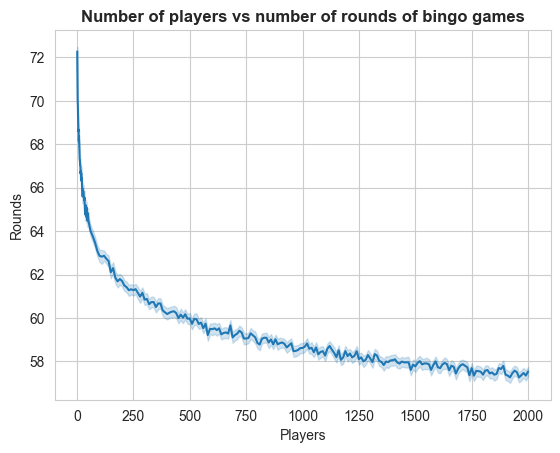

In [3]:
sb.lineplot(data=df_res, x='Players', y='Rounds')
plt.title('Number of players vs number of rounds of bingo games', fontweight='bold')
plt.show()

Nota:
- PARECE haber una buena relación exponencial o logaritmica entre ambas variables.

# Ajuste de curva exponencial para valores pequeños

Agrupamiento

In [5]:
rounds = df_res.query('Players <= 50').groupby('Players').mean()[['Rounds']].reset_index()
rounds.tail()

,Players,Rounds
45,46,64.685811
46,47,64.474747
47,48,64.665541
48,49,64.826531
49,50,64.520270


Preprocesamiento

In [6]:
log_players = np.log(rounds['Players'])

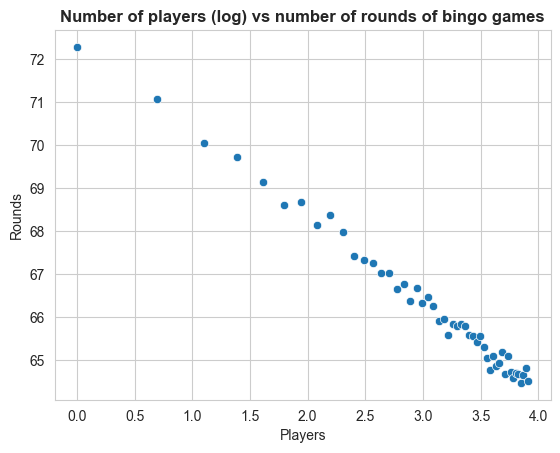

In [7]:
sb.scatterplot(x=log_players, y=rounds['Rounds'])
plt.title('Number of players (log) vs number of rounds of bingo games', fontweight='bold')
plt.show()

Parámetros de función ajustada

In [8]:
X = log_players
y = rounds['Rounds'].values

results = linregress(X, y)
print(results)

m = results.slope
b = results.intercept

LinregressResult(slope=-2.0200111488893775, intercept=72.41310809442716, rvalue=-0.9957901623951332, pvalue=1.7617389478607278e-51, stderr=0.026838326170146136, intercept_stderr=0.08312541009967192)


Predicciones

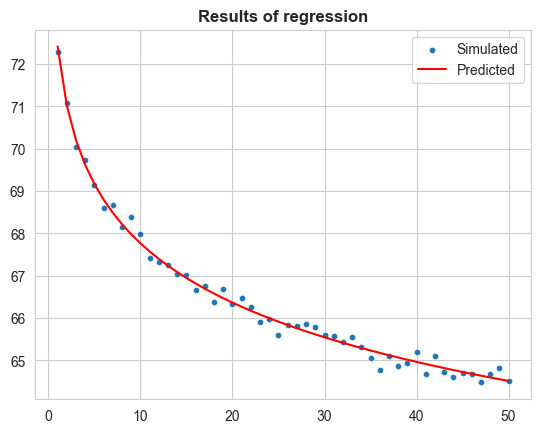

In [9]:
# True matrixes:
X_true = rounds['Players'].values
y_true = rounds['Rounds'].values

# Curve fitted:
preds = m * np.log(X_true) + b

# Plot:
sb.scatterplot(x=X_true, y=y_true, s=20, label='Simulated')
sb.lineplot(x=X_true, y=preds, c='r', label='Predicted')
plt.title('Results of regression', fontweight='bold')
plt.legend()
plt.show()

In [13]:
preds[:6]

array([72.41310809, 71.01294306, 70.19389902, 69.61277803, 69.16202557,
       68.79373399])

Visualizaciones de validación

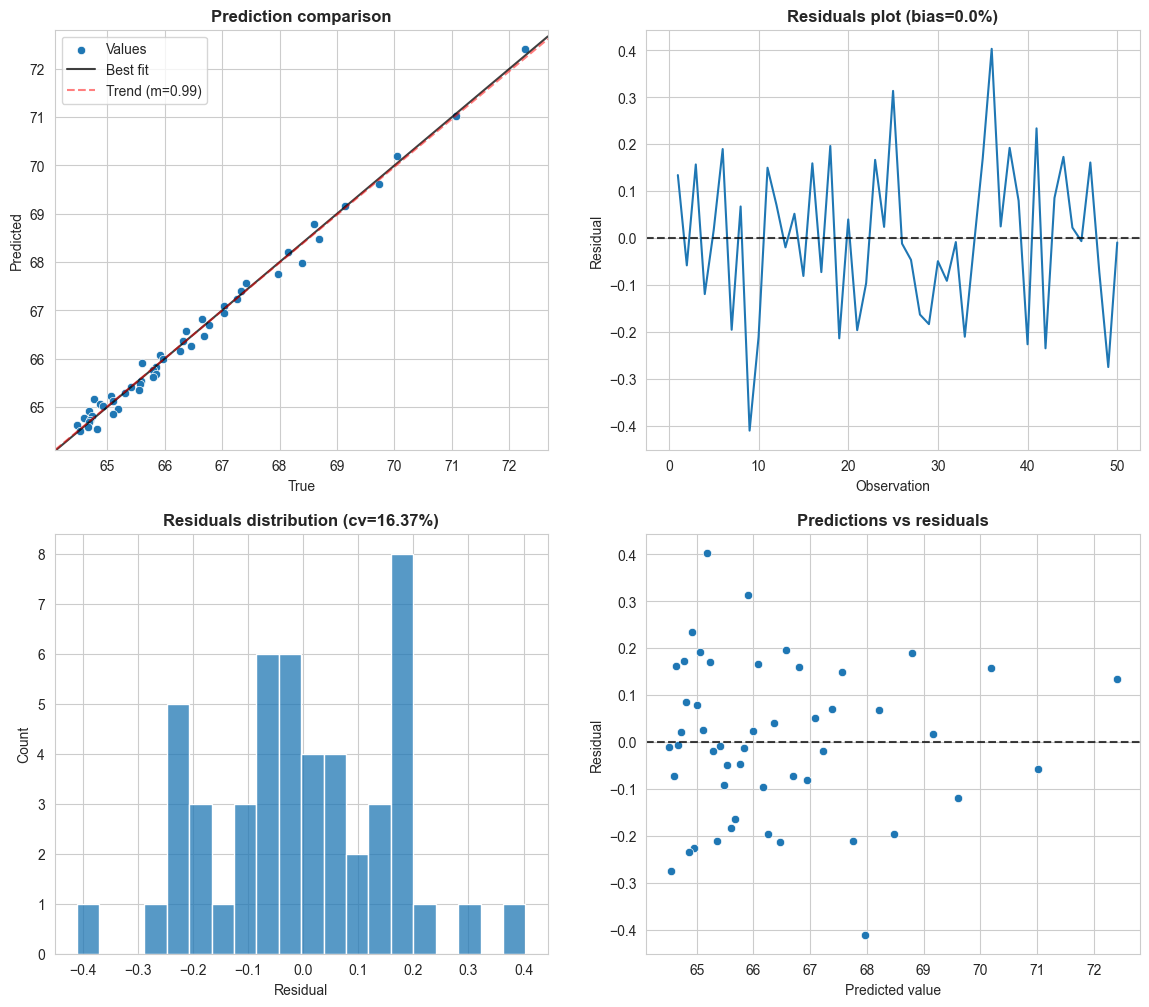

In [10]:
# Parameters of plotting:
fig, axes = plt.subplots(2, 2, figsize=(14,12))
axes = axes.flatten()

# Matrixes:
X_true = rounds['Players'].values
y_true = rounds['Rounds'].values

# Curve fitted:
preds = m * np.log(X_true) + b
r2 = round(r2_score(y_true, preds), 2)
# sb.scatterplot(data=rounds, x='Players', y='Rounds', ax=axes[0], label='True')
# sb.lineplot(x=X_true, y=preds, c='r', ax=axes[0], label='Predicted')
# axes[0].set_title(f'Curve fitted (R2={r2})', fontweight='bold')
# axes[0].legend()

# Prediction comparison:
avg = np.mean(y_true)
s = linregress(y_true, preds).slope
sb.scatterplot(x=y_true, y=preds, ax=axes[0], label='Values')
axes[0].axline((avg, avg), slope=1, color="black", linestyle='-',
               alpha=0.75, label='Best fit')
axes[0].axline((avg, avg), slope=s, color="red", linestyle='--',
               alpha=0.5, label=f'Trend (m={round(s,2)})')
axes[0].set_title('Prediction comparison', fontweight='bold')
axes[0].set_xlabel('True')
axes[0].set_ylabel('Predicted')
axes[0].legend()

# Residuals plot:
resids = preds - y_true
bias = round(np.mean(resids)*100, 2)
sb.lineplot(x=X_true, y=resids, ax=axes[1])
axes[1].axline((0, 0), slope=0, color="black", linestyle='--', alpha=0.75)
axes[1].set_title(f'Residuals plot (bias={bias}%)', fontweight='bold')
axes[1].set_xlabel('Observation')
axes[1].set_ylabel('Residual')

# Residuals histogram:
cv = round(np.std(resids)*100, 2)
sb.histplot(x=resids, bins=20, ax=axes[2])
axes[2].set_title(f'Residuals distribution (cv={cv}%)', fontweight='bold')
axes[2].set_xlabel('Residual')

# Residuals vs predictions:
sb.scatterplot(x=preds, y=resids, ax=axes[3])
axes[3].axline((np.mean(preds), np.mean(resids)), slope=0, color="black", linestyle='--', alpha=0.75)
axes[3].set_title(f'Predictions vs residuals', fontweight='bold')
axes[3].set_xlabel('Predicted value')
axes[3].set_ylabel('Residual')

plt.show()

### Conclusiones:
- El modelo predice bien para valores pequeños. El sesgo general es muy bajo y el ajuste es perfecto.
- El gráfico de residuales denota sesgo negligible.
- <b>La función logarítmica se ajusta correctamente a la data.